In [19]:
# library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import networkx as nx
import seaborn as sns
import numpy as np
import logging

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
tanimotito = pd.read_csv('similarityMatrix-hits.csv', delimiter=';', index_col=0)
#tanimotito.drop(tanimotito.columns[-1],axis=1,inplace=True)
similaridade_tanimoto = 1 - tanimotito
similaridade_tanimoto

,21070,12593,12666,12974,15338,15339,15849,17294,17296,17456,17474,17498,20403,20497,20499,20500,20509,20525,20550,21148,21266,3206,5651,6315,ZINC100199761,ZINC100232131,ZINC142456176,(E)-Nerolidol,ZINC1676040,ZINC175245225,ZINC1846611,ZINC1849759,ZINC2018831,ZINC2600024,ZINC33841709,ZINC3861087,ZINC4098262,ZINC59206468,ZINC59586886,ZINC59778978,ZINC6071066,ZINC62237753,ZINC64634151,ZINC8220462,ZINC8234296,ZINC968471,Unnamed: 47
21070,0.000000,0.796992,0.799697,0.807229,0.839947,0.849754,0.704787,0.900247,0.901245,0.906327,0.895793,0.912347,0.339921,0.705036,0.655263,0.776549,0.489855,0.242915,0.269565,0.089947,0.766323,0.851449,0.627040,0.880488,0.587719,0.753351,0.748092,0.868794,0.590278,0.836066,0.877076,0.632653,0.689873,0.924171,0.824561,0.857724,0.501845,0.714777,0.960784,0.682927,0.938389,0.734043,0.836957,0.840731,0.858553,0.958791,NaN
12593,0.796992,0.000000,0.236919,0.422914,0.460900,0.472973,0.647321,0.721049,0.727405,0.726943,0.727199,0.779241,0.783237,0.595620,0.621861,0.613087,0.699310,0.787535,0.799414,0.795385,0.842963,0.790507,0.570014,0.694815,0.889552,0.732857,0.809524,0.849379,0.735878,0.724812,0.806907,0.718507,0.713846,0.961600,0.741985,0.858766,0.716279,0.795764,0.912975,0.791541,0.836898,0.807044,0.742604,0.746744,0.822358,0.890582,NaN
12666,0.799697,0.236919,0.000000,0.247227,0.369153,0.394517,0.646617,0.723886,0.730263,0.732558,0.728305,0.791827,0.787482,0.581845,0.606335,0.623932,0.702778,0.786533,0.800296,0.801858,0.835596,0.787375,0.517751,0.684766,0.882979,0.727536,0.795122,0.834395,0.726283,0.742129,0.796474,0.700159,0.709828,0.962723,0.738390,0.856672,0.712264,0.794793,0.906452,0.786810,0.842742,0.798752,0.737237,0.735988,0.818040,0.895397,NaN
12974,0.807229,0.422914,0.247227,0.000000,0.318759,0.347884,0.665557,0.749810,0.753612,0.756798,0.746803,0.820080,0.806818,0.584437,0.611765,0.562914,0.727549,0.797753,0.809683,0.807760,0.859560,0.753452,0.532468,0.685908,0.890244,0.745981,0.813653,0.792381,0.748264,0.709059,0.732039,0.669759,0.684116,0.963671,0.684404,0.831373,0.732865,0.807958,0.875969,0.805172,0.861194,0.795699,0.705575,0.711375,0.789762,0.889600,NaN
15338,0.839947,0.460900,0.369153,0.318759,0.000000,0.162821,0.707733,0.686963,0.689432,0.692857,0.701727,0.766418,0.821795,0.634691,0.669302,0.604775,0.725000,0.812977,0.827451,0.844086,0.876963,0.813953,0.581486,0.705405,0.897987,0.759331,0.840112,0.836415,0.781965,0.773210,0.790462,0.748611,0.747599,0.968750,0.753804,0.866279,0.773713,0.834446,0.902299,0.832224,0.875297,0.824176,0.754032,0.737617,0.829876,0.905237,NaN
15339,0.849754,0.472973,0.394517,0.347884,0.162821,0.000000,0.720245,0.675543,0.677918,0.676718,0.685868,0.750913,0.824096,0.648582,0.677819,0.620647,0.744755,0.825623,0.838002,0.853750,0.878676,0.828188,0.608748,0.723270,0.905237,0.769880,0.853437,0.839523,0.794486,0.724675,0.806409,0.759067,0.759591,0.971091,0.731126,0.876510,0.788413,0.846154,0.909695,0.845488,0.874439,0.836943,0.768461,0.756219,0.839332,0.907710,NaN
15849,0.704787,0.647321,0.646617,0.665557,0.707733,0.720245,0.000000,0.841894,0.846216,0.848000,0.848816,0.874332,0.761124,0.490698,0.534279,0.557734,0.545035,0.734266,0.722922,0.690808,0.761905,0.758017,0.511727,0.634615,0.768571,0.473404,0.651235,0.755814,0.528571,0.836957,0.641337,0.603825,0.623684,0.933333,0.747549,0.700000,0.549296,0.591837,0.842105,0.604585,0.839583,0.566154,0.568000,0.567358,0.682081,0.875576,NaN
17294,0.900247,0.721049,0.723886,0.749810,0.686963,0.675543,0.841894,0.000000,0.067797,0.468185,0.519635,0.621816,0.883117,0.821119,0.836638,0.812746,0.839749,0.880837,0.895595,0.910670,0.909619,0.920271,0.796729,0.853323,0.939419,0.867729,0.919192,0.914894,0.884521,0.871837,0.913518,0.875828,0.867769,0.981051,0.875828,0.940925,0.883607,0.903545,0.949225,0.898431,0.834855,0.911277,0.879352,0.860862,0.914167,0.863830,NaN
17296,0.901245,0.727405,0.730263,0.753612,0.689432,0.677918,0.846216,0.067797,0.000000,0.477941,0.519380,0.623853,0.885808,0.821570,0.838118,0.816890,0.839399,0.884398,0.89836

In [21]:
similaridade_tanimoto.to_csv('similaridade_tanimoto.csv')

In [22]:
similaridade_tanimoto.drop('Unnamed: 47', axis='columns', inplace=True)

<AxesSubplot:>

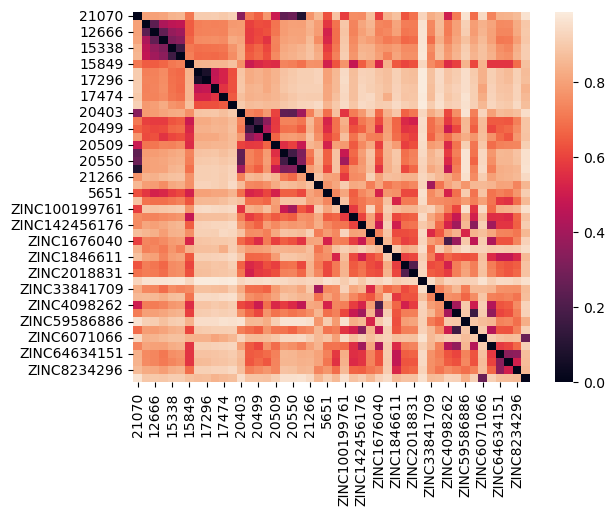

In [23]:
# Mostra similiaridade topologica baseada em coeficiente de tanimoto
sns.heatmap(similaridade_tanimoto)

In [24]:
pca = PCA(n_components=len(similaridade_tanimoto)).fit(similaridade_tanimoto)

Número de clusters = 18


/home/eduardo/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


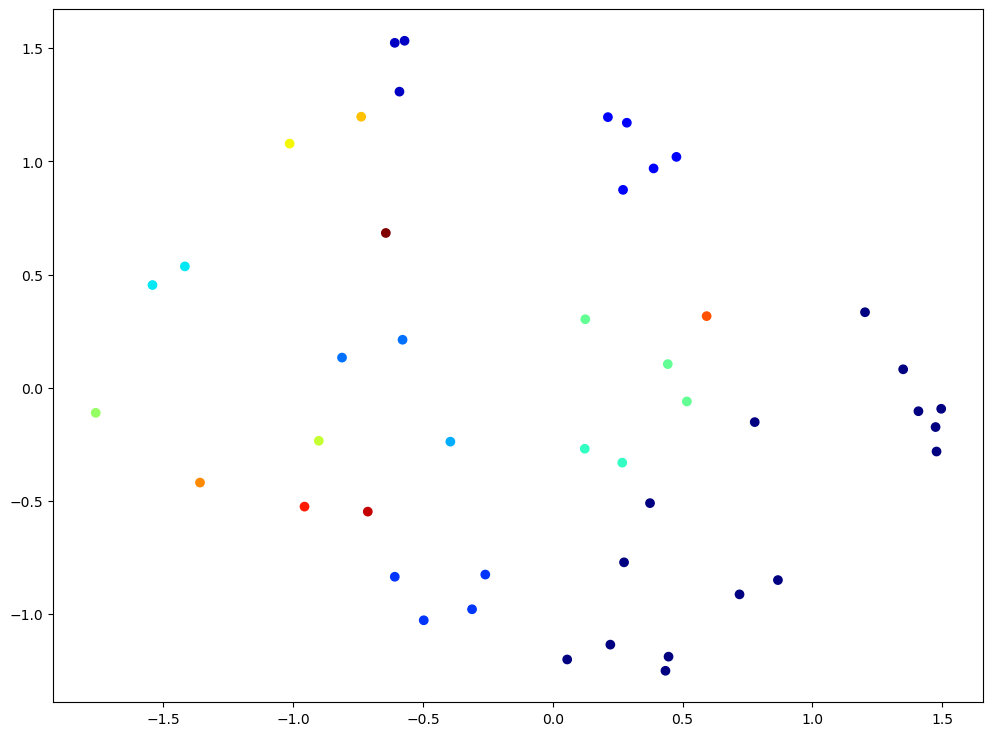

In [26]:
%matplotlib inline
figure = plt.figure(figsize=(12,9))
#figure.add_subplot(111, projection='3d')
ag = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='single', distance_threshold=0.4877615, compute_distances=True)
#ag = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage='single', distance_threshold=None, compute_distances=True)
cl = ag.fit_predict(similaridade_tanimoto)
m = MDS(n_components=2).fit_transform(similaridade_tanimoto)
plt.scatter(m[:,0],m[:,1], cmap = 'jet', c=cl)
print('Número de clusters =', len(pd.unique(cl)))

In [38]:
df = {'comp':similaridade_tanimoto.index, 'cluster': cl}
l = df['comp']
species = [t.split('_')[0] for t in l]
df['Compound'] = species
df = pd.DataFrame(df)
for c in sorted(pd.unique(cl)):
    s = pd.unique(df.loc[df['cluster']==c, 'Compound'])
    print('O cluster', c, 'contem os compostos', s)

O cluster 0 contem os compostos ['21070' '15849' '20403' '20509' '20525' '20550' '21148' 'ZINC100199761'
 'ZINC100232131' 'ZINC142456176' 'ZINC1676040' 'ZINC4098262'
 'ZINC59206468' 'ZINC59778978' 'ZINC62237753']
O cluster 1 contem os compostos ['17294' '17296' '17456']
O cluster 2 contem os compostos ['12593' '12666' '12974' '15338' '15339']
O cluster 3 contem os compostos ['ZINC1846611' 'ZINC64634151' 'ZINC8220462' 'ZINC8234296']
O cluster 4 contem os compostos ['3206' 'ZINC33841709']
O cluster 5 contem os compostos ['6315']
O cluster 6 contem os compostos ['ZINC6071066' 'ZINC968471']
O cluster 7 contem os compostos ['ZINC1849759' 'ZINC2018831']
O cluster 8 contem os compostos ['20497' '20499' '20500']
O cluster 9 contem os compostos ['ZINC2600024']
O cluster 10 contem os compostos ['(E)-Nerolidol']
O cluster 11 contem os compostos ['17498']
O cluster 12 contem os compostos ['17474']
O cluster 13 contem os compostos ['ZINC59586886']
O cluster 14 contem os compostos ['5651']
O cluster

In [27]:
AChE = ['ZINC3861087','ZINC2600024','ZINC33841709','ZINC1676040','15849','20500','20499','20497','20525','20403']
EcdR = ['ZINC3861087','ZINC1676040','ZINC33841709','ZINC2600024','21070','20509','21148','17474','15849']
JHBP = ['ZINC3861087','ZINC2600024','ZINC33841709','ZINC2018831','ZINC100199761','ZINC175245225','ZINC968471','ZINC1849759','21266','20499']
MET = ['ZINC3861087','ZINC33841709','ZINC2600024','ZINC1849759','ZINC2018831','ZINC175245225','ZINC1531550','ZINC968471','ZINC1846611','3206','20550','21266']
GABBAago = ['ZINC3861087','ZINC33841709','ZINC2600024','ZINC1676040','15339','15338','17498','20497','6315']
GABBAantago = ['17474','17498','17296','17456','17294','12666','20509','12593','21148']
OambRago = ['ZINC968471','ZINC1531550','ZINC1846611','ZINC1849759','ZINC2018831','ZINC2600024','ZINC3861087','ZINC6071066','ZINC8234296','ZINC33841709','ZINC59586886','21266']
OambRantago = ['ZINC4098262','ZINC8220462','ZINC59206468','ZINC59778978','ZINC62237753','ZINC64634151','ZINC100232131','ZINC142456176','5651','12974',]
alvos = {'AChe':AChE,
         'EcdR':EcdR,
         'JHBP':JHBP,
         'MET':MET,
         'GABBAago':GABBAago,
         'GABBAantago':GABBAantago,
         'OambRago':OambRago,
         'OambRantago':OambRantago}

In [37]:
df = {'comp':similaridade_tanimoto.index, 'cluster': cl}
l = df['comp']
species = [t.split('_')[0] for t in l]
df['Compound'] = species
df = pd.DataFrame(df)
for c in sorted(pd.unique(cl)):
    s = pd.unique(df.loc[df['cluster']==c, 'Compound'])
    print('Compostos do cluster:', c, 'tem compostos Top_Hits no alvo:', s)
    for lig in s:
        for k in alvos.keys():
            if lig in alvos[k]:
                print('Compostos do cluster:', c, 'tem compostos Top_Hits no alvo:', k)
                
    print('\n\n')
    

Compostos do cluster: 0 tem compostos Top_Hits no alvo: ['21070' '15849' '20403' '20509' '20525' '20550' '21148' 'ZINC100199761'
 'ZINC100232131' 'ZINC142456176' 'ZINC1676040' 'ZINC4098262'
 'ZINC59206468' 'ZINC59778978' 'ZINC62237753']
Compostos do cluster: 0 tem compostos Top_Hits no alvo: EcdR
Compostos do cluster: 0 tem compostos Top_Hits no alvo: AChe
Compostos do cluster: 0 tem compostos Top_Hits no alvo: EcdR
Compostos do cluster: 0 tem compostos Top_Hits no alvo: AChe
Compostos do cluster: 0 tem compostos Top_Hits no alvo: EcdR
Compostos do cluster: 0 tem compostos Top_Hits no alvo: GABBAantago
Compostos do cluster: 0 tem compostos Top_Hits no alvo: AChe
Compostos do cluster: 0 tem compostos Top_Hits no alvo: MET
Compostos do cluster: 0 tem compostos Top_Hits no alvo: EcdR
Compostos do cluster: 0 tem compostos Top_Hits no alvo: GABBAantago
Compostos do cluster: 0 tem compostos Top_Hits no alvo: JHBP
Compostos do cluster: 0 tem compostos Top_Hits no alvo: OambRantago
Compostos d